# Graphs

# Document

<table align="left">
    <tr>
        <th class="text-align:left">Title</th>
        <td class="text-align:left">Create graphs</td>
    </tr>
    <tr>
        <th class="text-align:left">Last modified</th>
        <td class="text-align:left">2019-01-31</td>
    </tr>
    <tr>
        <th class="text-align:left">Author</th>
        <td class="text-align:left">Gilles Pilon <gillespilon13@gmail.com></td>
    </tr>
    <tr>
        <th class="text-align:left">Status</th>
        <td class="text-align:left">Active</td>
    </tr>
    <tr>
        <th class="text-align:left">Type</th>
        <td class="text-align:left">Jupyter notebook</td>
    </tr>
    <tr>
        <th class="text-align:left">Created</th>
        <td class="text-align:left">2018-12-21</td>
    </tr>
    <tr>
        <th class="text-align:left">File name</th>
        <td class="text-align:left">graphys.ipynb</td>
    </tr>
    <tr>
        <th class="text-align:left">Other files required</th>
        <td class="text-align:left">cloquet_two_weeks_60_min.csv</td>
    </tr>
</table>

# Ideas

- Box and whisker plot.
- Line plot.
- Scatter plot.
- Histogram.
- Normal probability plot.
- X and mR charts.
- Scatter plot matrix.

In [1]:
# Read a csv file.
import pandas as pd
FILE_RAW = 'cloquet_two_weeks_60_min.csv'
df = pd.read_csv(FILE_RAW,
                 parse_dates=True,
                 index_col='Time')

## Box and whisker plot

[Text(0,0,' ')]

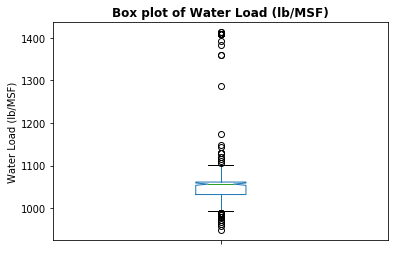

In [2]:
%matplotlib inline
ax1 = df.plot.box(y='Water Load (lb/MSF)',
                 notch=True)
ax1.set_title('Box plot of ' + 'Water Load (lb/MSF)',
              fontweight='bold')
ax1.set_ylabel('Water Load (lb/MSF)')
ax1.set_xticklabels(' ')

## Line plot

Text(0,0.5,'Water Load (lb/MSF)')

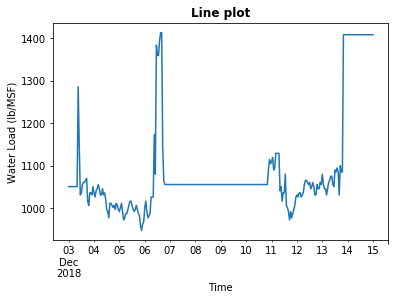

In [3]:
ax2 = df.plot.line(y='Water Load (lb/MSF)',
                   legend=False)
ax2.set_title('Line plot',
              fontweight='bold')
ax2.set_ylabel('Water Load (lb/MSF)')

## Scatter plot

Text(0,0.5,'Water Load (lb/MSF)')

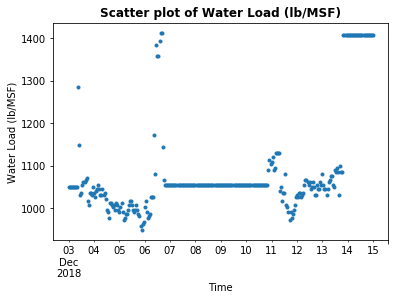

In [4]:
ax3 = df.plot.line(y='Water Load (lb/MSF)',
                   legend=False,
                   style='.')
ax3.set_title('Scatter plot of ' + 'Water Load (lb/MSF)',
              fontweight='bold')
ax3.set_ylabel('Water Load (lb/MSF)')

## Histogram

Text(0.5,0,'Water Load (lb/MSF)')

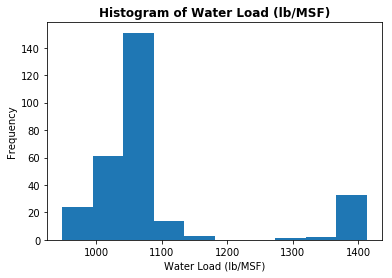

In [5]:
ax4 = df.plot.hist(y='Water Load (lb/MSF)',
                   legend=False)
ax4.set_title('Histogram of '+ 'Water Load (lb/MSF)',
              fontweight='bold')
ax4.set_xlabel('Water Load (lb/MSF)')

## Normal probability plot

Text(0.5,1,'Normal probability plot of Water Load (lb/MSF)')

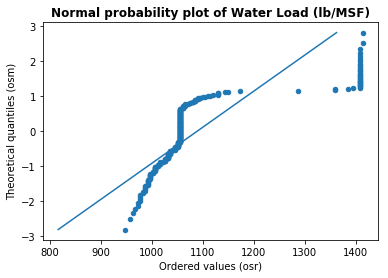

In [6]:
# Create a normal probability plot.
from scipy import stats
(osm, osr), (slope, intercept, r) = stats.probplot(df['Water Load (lb/MSF)'], fit=True)
dfnpp = pd.DataFrame.from_dict({'Theoretical quantiles (osm)': osm,
                                'Ordered values (osr)': osr})
ax5 = dfnpp.plot.scatter('Ordered values (osr)',
                         'Theoretical quantiles (osm)')
ax5.plot(slope * osm + intercept, osm)
ax5.set_title('Normal probability plot of ' + 'Water Load (lb/MSF)',
              fontweight='bold')

## X and mR charts

Text(0,0.5,'Water Load (lb/MSF)')

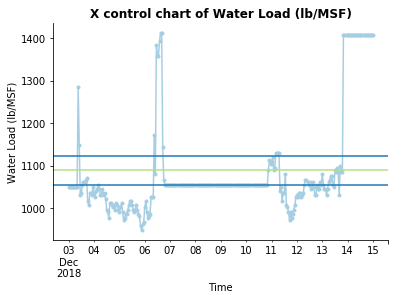

In [7]:
# Use the datasense package.
import datasense as ds
x = ds.X(df['Water Load (lb/MSF)'].to_frame())
ax6 =x.ax
ax6.set_title('X control chart of ' + 'Water Load (lb/MSF)',
              fontweight='bold')
ax6.set_ylabel('Water Load (lb/MSF)')

Text(0,0.5,'Water Load (lb/MSF)')

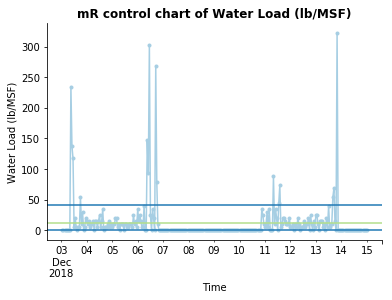

In [8]:
y = ds.mR(df['Water Load (lb/MSF)'].to_frame())
ax7 = y.ax
ax7.set_title('mR control chart of ' + 'Water Load (lb/MSF)',
              fontweight='bold')
ax7.set_ylabel('Water Load (lb/MSF)')

## Scatter plot matrix

In [9]:
df.columns

Index(['Water Load (lb/MSF)', 'Trim Board Density (lb/cft)',
       'Trim Board Thickness (in)', 'Trim Board Weight (lb/sft)',
       'Wool Target (%)', 'Wool Usage (%)', 'Wool Flow (lb/min)',
       'Starch Target (%)', 'Starch Usage (%)', 'Starch Flow (lb/min)',
       'Clay Target (%)', 'Clay Usage (%)', 'Clay Flow (lb/min)',
       'Newsprint Target (%)', 'Newsprint Usage (%)', 'Perlite Target (%)',
       'Perlite Usage (%)', 'Wet Clay Target (%)', 'Wet Clay Usage (%)',
       'Wet Gypsum Target (%)', 'Wet Gypsum Usage (%)', 'Wet Broke Target (%)',
       'Wet Broke Usage (%)', 'Dust Target (%)', 'Dust Usage (%)',
       'Broke Target (%)', 'Broke Usage (%)', 'Consistency Target (%)',
       'Consistency Actual (%)'],
      dtype='object')

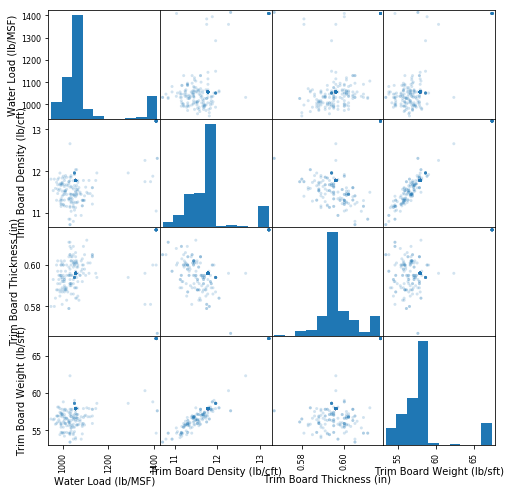

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['Water Load (lb/MSF)', \
                   'Trim Board Density (lb/cft)',
                   'Trim Board Thickness (in)',
                   'Trim Board Weight (lb/sft)']],
                   alpha=0.2,
                   figsize=(8,8));